# Importing Libraries

In [1]:
%%time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.layers import Dense, Activation, Embedding, Flatten, ReLU, LeakyReLU, PReLU, ELU, BatchNormalization, Dropout
from tensorflow.keras.utils import plot_model
from sklearn.metrics import confusion_matrix, accuracy_score

CPU times: total: 1.08 s
Wall time: 4.14 s


# Reading Data

In [2]:
df = pd.read_csv("../data/Churn_Modelling.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# Data Preprocessing

In [3]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [4]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
df.describe(include = "all")

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [8]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [9]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

from tensorflow.keras.applications import --> All pretrained & SOTA models like VGG16, ResNet, etc.

In [10]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [11]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [12]:
geography = pd.get_dummies(df['Geography'], drop_first = True)
gender = pd.get_dummies(df['Gender'], drop_first = True)

In [13]:
df.drop(['Geography', 'Gender'], axis = 1, inplace = True)

In [14]:
dataset = pd.concat([df, geography, gender], axis = 1)
dataset

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,9997,15569892,Johnstone,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,9998,15584532,Liu,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,9999,15682355,Sabbatini,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


In [15]:
dataset = dataset[['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Germany', 'Spain', 'Male', 'Exited']]
dataset

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male,Exited
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,False,False,False,1
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,False,True,False,0
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,False,False,False,1
3,4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,False,False,False,0
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,False,True,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,39,5,0.00,2,1,0,96270.64,False,False,True,0
9996,9997,15569892,Johnstone,516,35,10,57369.61,1,1,1,101699.77,False,False,True,0
9997,9998,15584532,Liu,709,36,7,0.00,1,0,1,42085.58,False,False,False,1
9998,9999,15682355,Sabbatini,772,42,3,75075.31,2,1,0,92888.52,True,False,True,1


In [16]:
dataset['EstimatedSalary'].mean()

100090.239881

<Axes: >

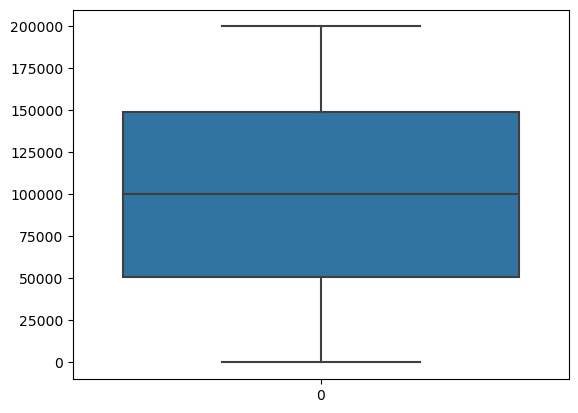

In [17]:
sns.boxplot(dataset['EstimatedSalary'])

In [18]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Age              10000 non-null  int64  
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   NumOfProducts    10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   IsActiveMember   10000 non-null  int64  
 10  EstimatedSalary  10000 non-null  float64
 11  Germany          10000 non-null  bool   
 12  Spain            10000 non-null  bool   
 13  Male             10000 non-null  bool   
 14  Exited           10000 non-null  int64  
dtypes: bool(3), float64(2), int64(9), object(1)
memory usage: 966.9+ KB


# Splitting Dataset

In [19]:
X = dataset.iloc[:, 3:14]
y = dataset.iloc[:,14:]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1, stratify = y)

In [21]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

# Artificial Neural Network (ANN)

In [22]:
# Initializing the ANN, This is an empty neural network
classifier = Sequential()

In [23]:
# Adding the input layer and the first hidden layer
# units/output dimension is the number of hidden neurons in the first layer
# kernel_initializer/init is the weight initialization parameter, where he_normal/he_uniform are the techniques
# While using relu as an activation function he_normal/he_uniform works well
# By using hyperparameter tuning, we'll find the exact number of hidden neurons, but now for initialization we used 6
classifier.add(Dense(units = 6, kernel_initializer= 'he_uniform', activation = 'relu', input_dim = 11))

In [24]:
# Adding the second hidden layer
# All the hidden layers must have RELU or LeakyRELU as the activation function,and relu prevents vanishing gradient
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform', activation = 'relu'))

In [25]:
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

In [26]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 72        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [27]:
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Plotting ANN

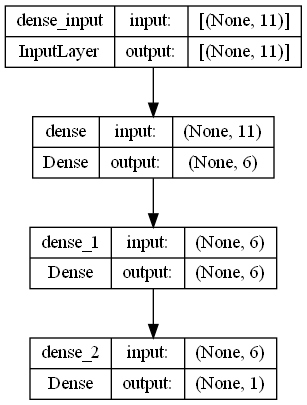

In [28]:
# Plot the model architecture
plot_model(classifier, to_file='../images/1 ANN.png', show_shapes=True, show_layer_names=True)

In [29]:
%%time
# Fitting the ANN to the training dataset
# validation_split tests the model separately for the test dataset
model_history = classifier.fit(X_train, y_train, validation_split = 0.33, batch_size = 10, epochs = 100)

Epoch 1/100
536/536 [==============================] - 1s 1ms/step - loss: 0.6576 - accuracy: 0.6576 - val_loss: 0.5067 - val_accuracy: 0.7849
Epoch 2/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4690 - accuracy: 0.8046 - val_loss: 0.4770 - val_accuracy: 0.7868
Epoch 3/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4405 - accuracy: 0.8084 - val_loss: 0.4578 - val_accuracy: 0.7944
Epoch 4/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4226 - accuracy: 0.8136 - val_loss: 0.4482 - val_accuracy: 0.7978
Epoch 5/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4083 - accuracy: 0.8153 - val_loss: 0.4325 - val_accuracy: 0.8027
Epoch 6/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3965 - accuracy: 0.8199 - val_loss: 0.4244 - val_accuracy: 0.8042
Epoch 7/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3870 - accuracy: 0.8235 - val_loss: 0.4164 - val_accuracy: 0.8050

In [30]:
# Making the predictions and testing the model
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 [==============================] - 0s 789us/step


In [31]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1531,   62],
       [ 221,  186]], dtype=int64)

In [32]:
# Calculating the accuracy
score = accuracy_score(y_pred, y_test)
score
# All accuracies are almost same

0.8585

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


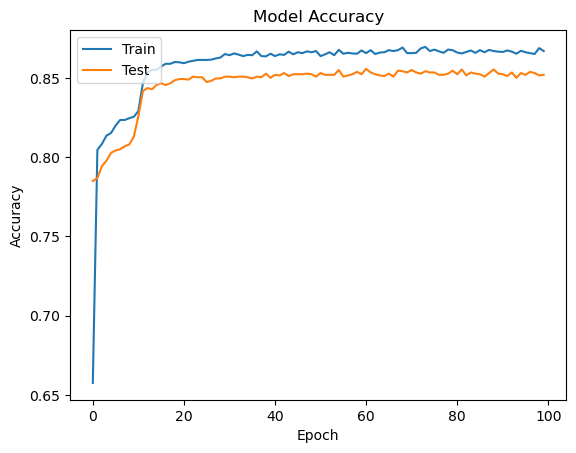

In [33]:
# List all data in history
print(model_history.history.keys())

# Summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc = 'upper left')
plt.show()

# ANN with Third Hidden Layer

In [34]:
# Initializing the ANN, This is an empty neural network
classifier = Sequential()

In [35]:
# Adding the Input Layer and First Hidden layer
classifier.add(Dense(units = 10, kernel_initializer = 'he_normal', activation = 'relu', input_dim = 11))

In [36]:
# Adding Second Hidden Layer
classifier.add(Dense(units = 20, kernel_initializer = 'he_normal', activation = 'relu'))

In [37]:
# Adding Third Hidden layer
# By adding multiple layers there's a chance of Overfitting
classifier.add(Dense(units = 15, kernel_initializer = 'he_normal', activation = 'relu'))

In [38]:
# Adding the Output Layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

In [39]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                120       
                                                                 
 dense_4 (Dense)             (None, 20)                220       
                                                                 
 dense_5 (Dense)             (None, 15)                315       
                                                                 
 dense_6 (Dense)             (None, 1)                 16        
                                                                 
Total params: 671
Trainable params: 671
Non-trainable params: 0
_________________________________________________________________


In [40]:
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Plotting ANN

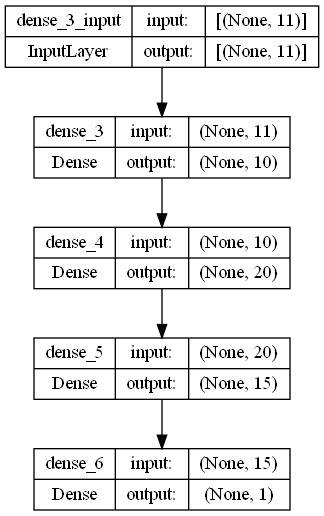

In [41]:
# Plot the model architecture
plot_model(classifier, to_file='../images/2 ANN with Third Layer.png', show_shapes=True, show_layer_names=True)

In [42]:
%%time
model_history = classifier.fit(X_train, y_train, validation_split = 0.33, batch_size = 10, epochs = 100)

Epoch 1/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4845 - accuracy: 0.8020 - val_loss: 0.4659 - val_accuracy: 0.7944
Epoch 2/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4240 - accuracy: 0.8162 - val_loss: 0.4416 - val_accuracy: 0.8152
Epoch 3/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4034 - accuracy: 0.8300 - val_loss: 0.4246 - val_accuracy: 0.8194
Epoch 4/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3852 - accuracy: 0.8378 - val_loss: 0.4040 - val_accuracy: 0.8323
Epoch 5/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3674 - accuracy: 0.8479 - val_loss: 0.3955 - val_accuracy: 0.8413
Epoch 6/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3552 - accuracy: 0.8563 - val_loss: 0.3815 - val_accuracy: 0.8425
Epoch 7/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3475 - accuracy: 0.8556 - val_loss: 0.3764 - val_accuracy: 0.8421

In [43]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 [==============================] - 0s 803us/step


In [44]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1493,  100],
       [ 205,  202]], dtype=int64)

In [45]:
# This time after adding the third layer we can see that train & validation accuracy has increased, but test has decreased
score = accuracy_score(y_pred, y_test)
score

0.8475

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


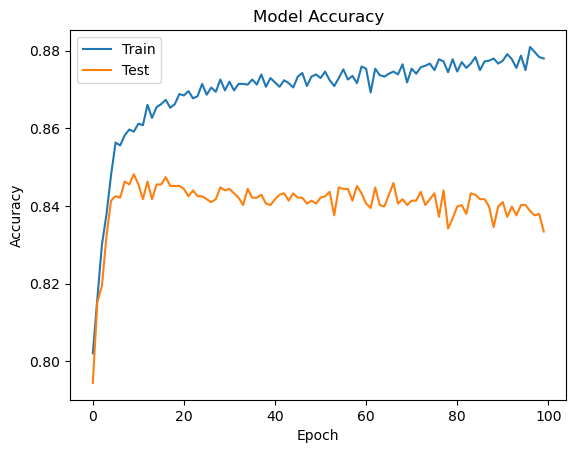

In [46]:
# List all data in history
print(model_history.history.keys())

# Summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc = 'upper left')
plt.show()

# ANN with Third Hidden layer and Dropout Layer

In [47]:
classifier = Sequential()

In [48]:
# Adding the Input Layer and First Hidden layer
classifier.add(Dense(units = 10, kernel_initializer = 'he_normal', activation = 'relu', input_dim = 11))

In [49]:
# Later on we'll find the dropout values by using hyperparameter tuning
classifier.add(Dropout(0.3))

In [50]:
# Adding Second Hidden Layer
classifier.add(Dense(units = 20, kernel_initializer= 'he_normal', activation = 'relu'))

In [51]:
classifier.add(Dropout(0.4))

In [52]:
# Adding Third Hidden layer
classifier.add(Dense(units = 15, kernel_initializer = 'he_normal', activation = 'relu'))

In [53]:
classifier.add(Dropout(0.2))

In [54]:
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

In [55]:
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 10)                120       
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense_8 (Dense)             (None, 20)                220       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_9 (Dense)             (None, 15)                315       
                                                                 
 dropout_2 (Dropout)         (None, 15)                0         
                                                                 
 dense_10 (Dense)            (None, 1)                

In [56]:
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Plotting ANN

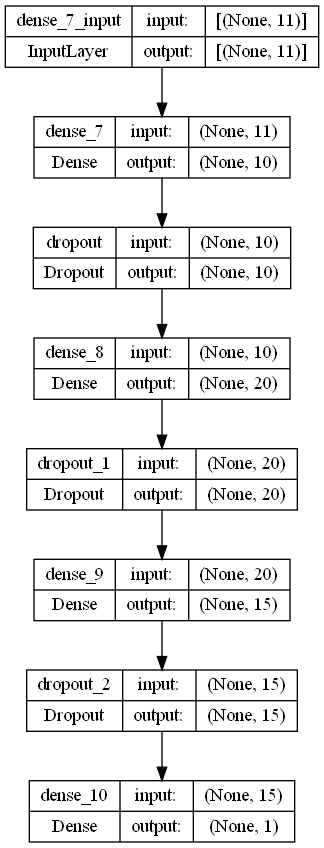

In [57]:
# Plot the model architecture
plot_model(classifier, to_file='../images/3 ANN with Third Hidden Layer and Dropout Layer.png', show_shapes=True, show_layer_names=True)

In [58]:
%%time
model_history = classifier.fit(X_train, y_train, validation_split= 0.33, batch_size = 10, epochs = 100)

Epoch 1/100
536/536 [==============================] - 1s 1ms/step - loss: 0.6444 - accuracy: 0.7367 - val_loss: 0.5117 - val_accuracy: 0.7842
Epoch 2/100
536/536 [==============================] - 1s 1ms/step - loss: 0.5346 - accuracy: 0.7903 - val_loss: 0.4997 - val_accuracy: 0.7891
Epoch 3/100
536/536 [==============================] - 1s 1ms/step - loss: 0.5016 - accuracy: 0.7990 - val_loss: 0.4875 - val_accuracy: 0.7861
Epoch 4/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4832 - accuracy: 0.8024 - val_loss: 0.4779 - val_accuracy: 0.7864
Epoch 5/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4740 - accuracy: 0.8065 - val_loss: 0.4668 - val_accuracy: 0.7883
Epoch 6/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4614 - accuracy: 0.8106 - val_loss: 0.4572 - val_accuracy: 0.7914
Epoch 7/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4457 - accuracy: 0.8091 - val_loss: 0.4350 - val_accuracy: 0.8050

In [59]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 [==============================] - 0s 749us/step


In [60]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1569,   24],
       [ 262,  145]], dtype=int64)

In [61]:
score = accuracy_score(y_pred, y_test)
score

0.857

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


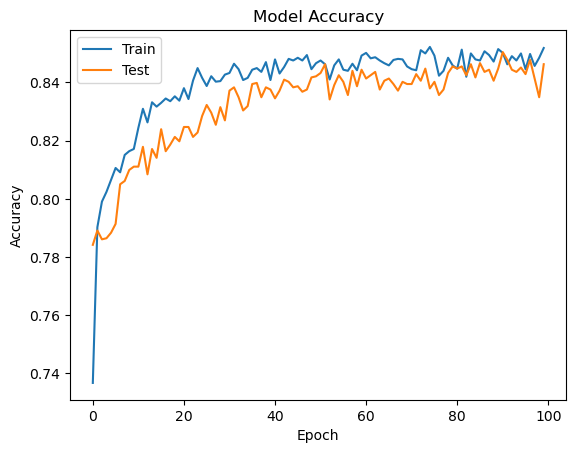

In [62]:
# List all data in history
print(model_history.history.keys())

# Summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc = 'upper left')
plt.show()

# Hyperparameter Optimization

In [63]:
def create_model(layers, activation):
    # Initialising the model
    model = Sequential()
    for i, nodes in enumerate(layers):
        # For first layer we have to provide input dimensions
        if i == 0:
            model.add(Dense(nodes, input_dim = X_train.shape[1]))
            model.add(Activation(activation))
            model.add(Dropout(0.3))
        
        else:
            model.add(Dense(nodes))
            model.add(Activation(activation))
            model.add(Dropout(0.3))

    # Last layer will have only 1 output
    model.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))
    
    model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    # Plot the model architecture vertically
    plot_model(model, to_file='../images/4 ANN Hyperparameter Tuned.png', show_shapes=True, show_layer_names=True)
    # Plot the model architecture horizontally
    plot_model(model, to_file='../images/5 ANN Hyperparameter Tuned Horizontal.png', show_shapes=True, show_layer_names=True, rankdir='LR')
    return model

model = KerasClassifier(build_fn = create_model, verbose = 0)

C:\Users\Sanket\AppData\Local\Temp\ipykernel_14640\2762355705.py:26: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model, verbose = 0)


In [64]:
%%time

# Iterations where 1combination is 1 neural network and the number is the number of neurons
layers = [[20], [20,40], [45,30,15]]

# There is a way for taking this layers as well will discuss later
activations = ['sigmoid', 'relu']
param_grid = dict(layers = layers, activation = activations, batch_size = [128, 256], epochs = [30])

# Creating dictionary of parameters
grid = GridSearchCV(estimator = model, param_grid = param_grid, cv = 5) #RandomizedSearchCV can also be used

grid_result = grid.fit(X_train, y_train)

CPU times: total: 37.8 s
Wall time: 1min 58s


In [65]:
print(grid_result.best_score_, grid_result.best_params_)

0.8556249976158142 {'activation': 'relu', 'batch_size': 256, 'epochs': 30, 'layers': [45, 30, 15]}


In [66]:
pred_y = grid.predict(X_test)
y_pred = (pred_y > 0.5)

63/63 [==============================] - 0s 790us/step


In [67]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1533,   60],
       [ 247,  160]], dtype=int64)

In [68]:
score = accuracy_score(y_pred, y_test)
score

0.8465

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


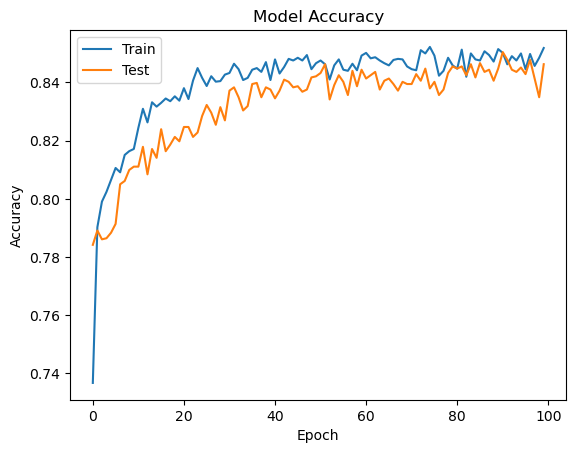

In [69]:
# List all data in history
print(model_history.history.keys())

# Summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc = 'upper left')
plt.show()